## Procesamiento y extracción de características de una señal EEG 

#### Importación de librerías

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import neurokit2 as nk
import biosignalsnotebooks as bsnb


from scipy.signal import spectrogram, welch
from scipy.signal import iirnotch, lfilter


#### Importación de la señal

In [58]:
SenalEEG = np.genfromtxt("Signal/EEG_Toma2_ejercicios.txt", delimiter ="\t", skip_header=3)
Fs = 100
EEG = SenalEEG[:,5]

t = bsnb.generate_time(EEG, Fs)


#Función de transferencia 
Gemg = 41782
Vcc = 3.3
n = 10

EEG = (((EEG/2**n)-(1/2))*Vcc)/Gemg
EEG = EEG * (1*10**6)

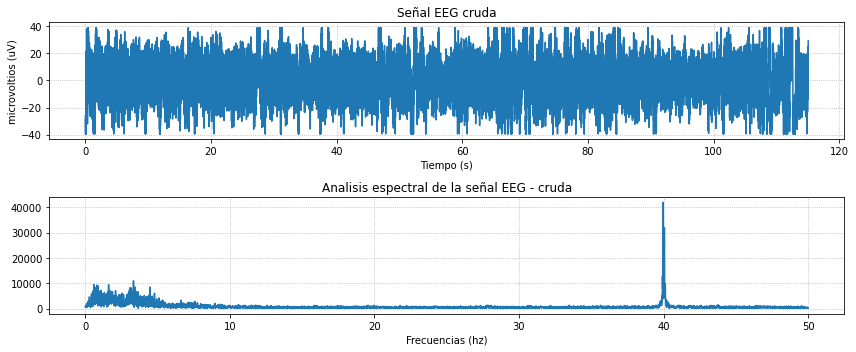

In [59]:
#Transformada de Fourier
freq_axis_1, power_spect_1 = bsnb.plotfft(EEG, Fs)

#Visualización de la señal
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.plot(t,EEG)
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("microvoltios (uV)")
plt.title("Señal EEG cruda")    # graficamos la señal

#Respuesta en frecuecnia
plt.subplot(212)
plt.grid(linestyle=":")
plt.title("Analisis espectral de la señal EEG - cruda")
plt.xlabel("Frecuencias (hz)")
plt.plot(freq_axis_1, power_spect_1)
plt.tight_layout()
fig = plt.gcf()
fig.set_facecolor('white')
#plt.savefig('ECGyFFT_crudo.png', transparent=False, )
plt.show()

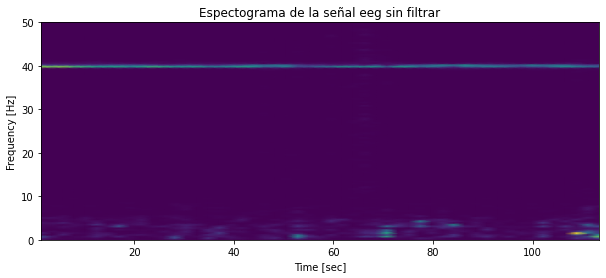

In [60]:
f, t, Sxx = spectrogram(EEG, fs = Fs)

plt.figure(figsize=(10,4))
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.title("Espectograma de la señal eeg sin filtrar")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()


#### Filtrado y separación por bandas

In [61]:
# Utilizar filtros Notch para quitar frecuencias que hagan ruido # Frecuencia de muestreo (Hz)
f0 = 40.0  # Frecuencia que queremos filtrar (Hz)
Q = 20.0  # Factor de Calidad
# Diseño de filtro notch
b, a = iirnotch(f0, Q, Fs)
EEG = lfilter(b, a, EEG)
EEG = lfilter(b, a, EEG)

Delta_band = bsnb.bandpass(EEG, f1=1,f2=4, order=2, fs=Fs)
Theta_band = bsnb.bandpass(EEG, f1=4,f2=8, order=2, fs=Fs)
Alpha_band = bsnb.bandpass(EEG, f1=8,f2=13, order=2, fs=Fs)
Beta_band = bsnb.bandpass(EEG, f1=13,f2=30, order=2, fs=Fs)
Gamma_band = bsnb.bandpass(EEG, f1=30,f2=49, order=2, fs=Fs)



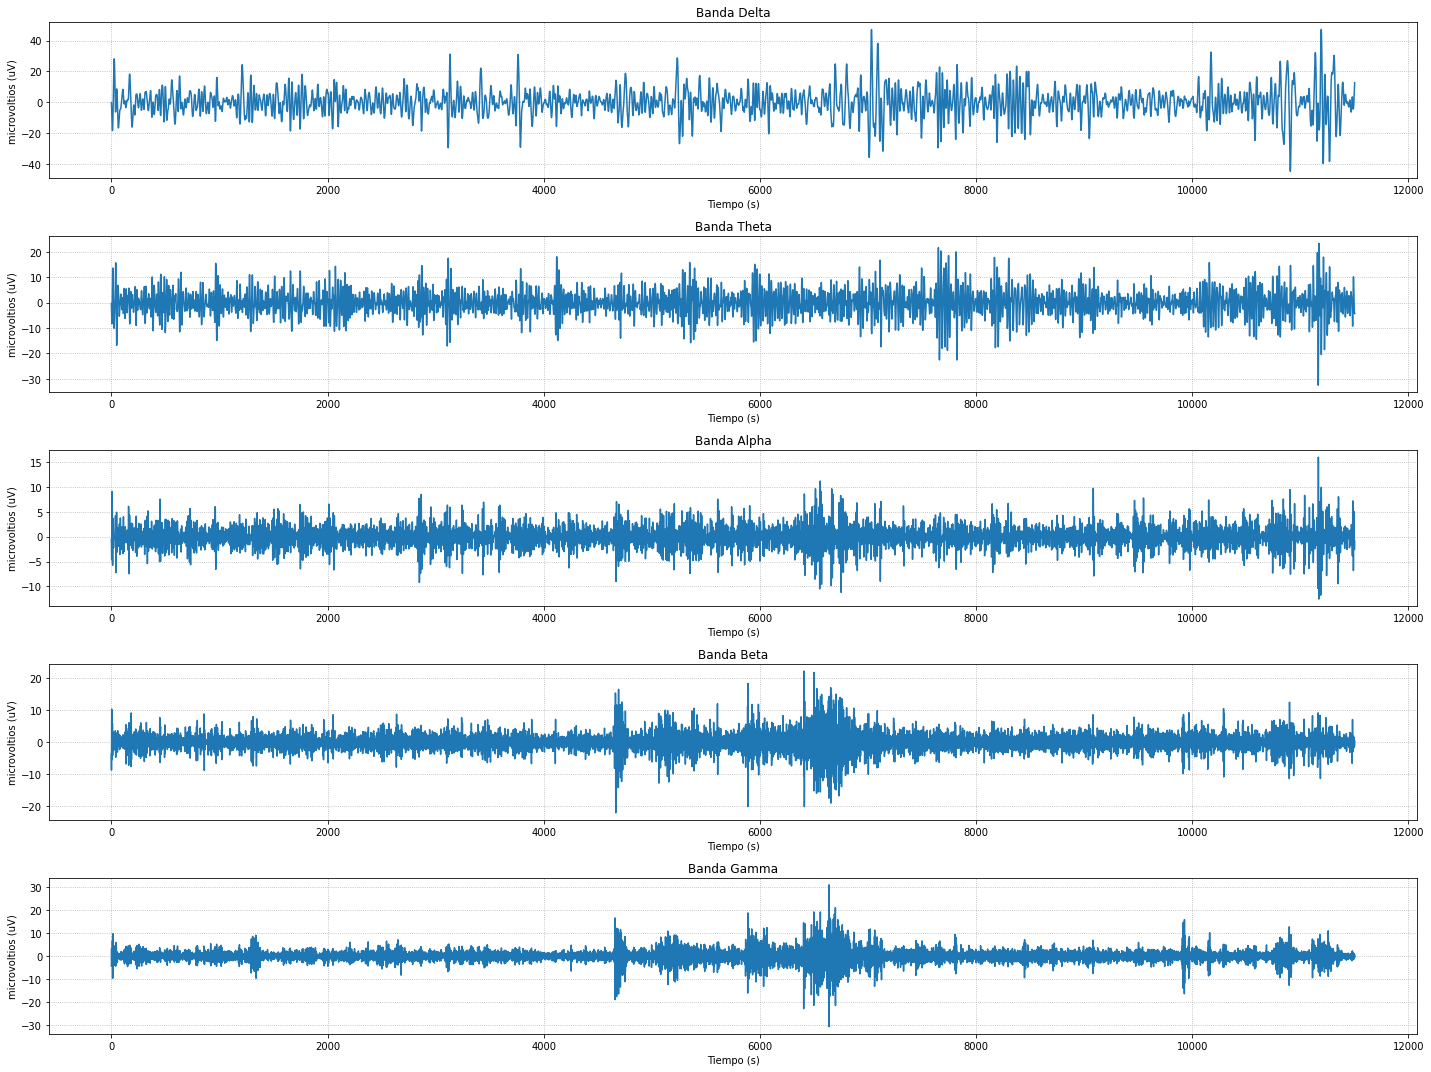

In [62]:

#Banda Delta
plt.figure(figsize=(20,15))
plt.subplot(511)
plt.subplots_adjust(hspace=1)
plt.plot(Delta_band) # graficamos la señal filtrada
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("microvoltios (uV)")
plt.title("Banda Delta")

#Banda Theta
plt.subplot(512)
plt.plot(Theta_band) # graficamos la señal filtrada
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("microvoltios (uV)")
plt.title("Banda Theta")

#Banda Alpha
plt.subplot(513)
plt.plot(Alpha_band) # graficamos la señal filtrada
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("microvoltios (uV)")
plt.title("Banda Alpha")

#Banda Beta
plt.subplot(514)
plt.plot(Beta_band) # graficamos la señal filtrada
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("microvoltios (uV)")
plt.title("Banda Beta")

#Banda Gamma
plt.subplot(515)
plt.plot(Gamma_band) # graficamos la señal filtrada
plt.grid(linestyle=":")
plt.xlabel("Tiempo (s)")
plt.ylabel("microvoltios (uV)")
plt.title("Señal EEG filtrada")
plt.title("Banda Gamma")
plt.tight_layout()
fig = plt.gcf()
fig.set_facecolor('white')
#plt.savefig('ECGyFFT_filtrada.png', transparent=False, )

In [67]:
f1, t1, Sxx1 = spectrogram(Delta_band, fs = Fs)
f2, t2, Sxx2 = spectrogram(Theta_band, fs = Fs)
f3, t3, Sxx3 = spectrogram(Alpha_band, fs = Fs)
f4, t4, Sxx4 = spectrogram(Beta_band, fs = Fs)
f5, t5, Sxx5 = spectrogram(Gamma_band, fs = Fs)



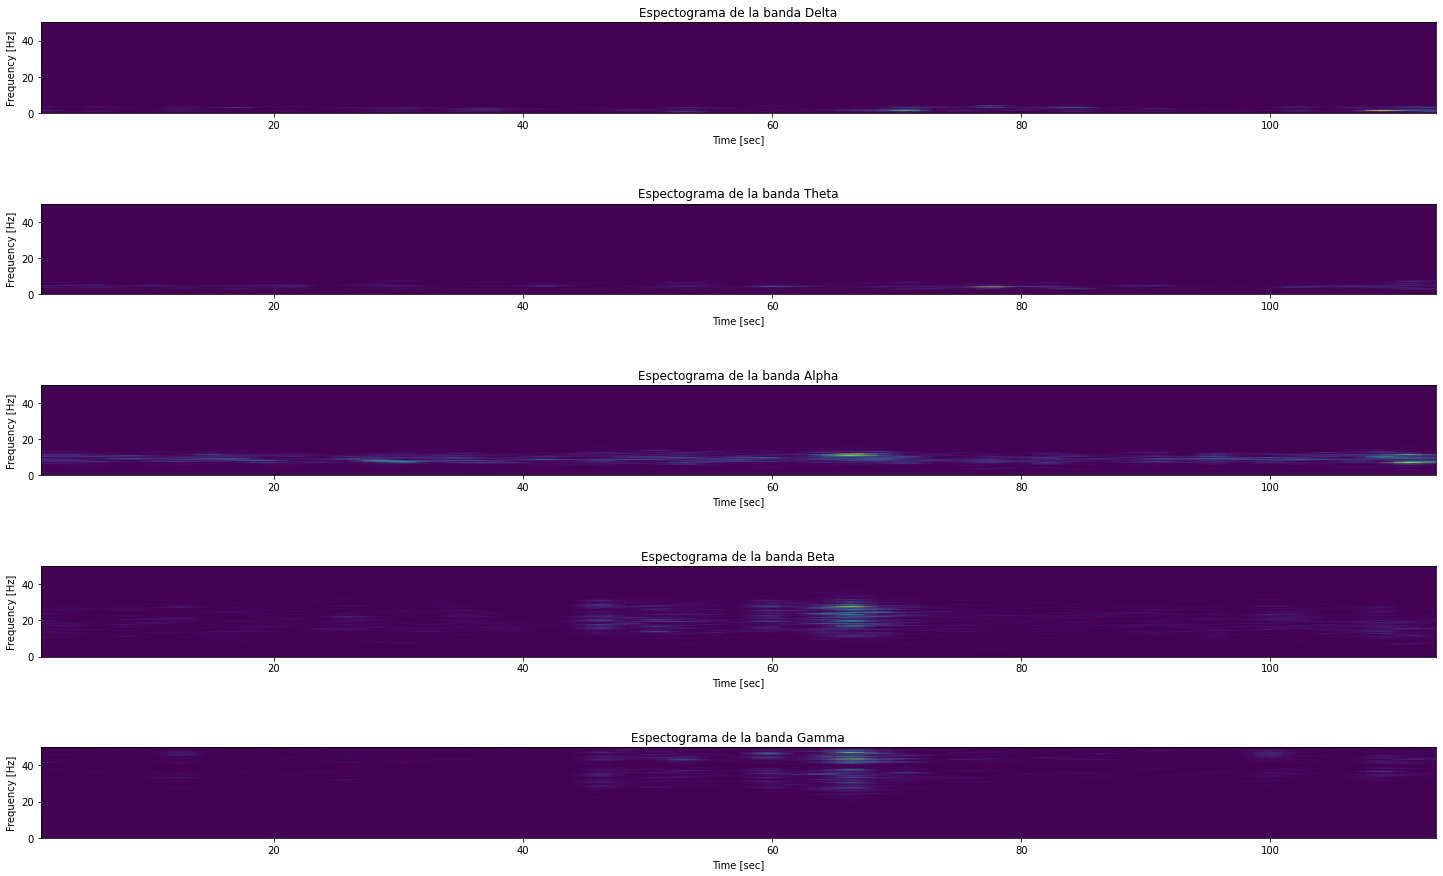

In [69]:
plt.figure(figsize=(25,15))
plt.subplot(511)
plt.subplots_adjust(hspace=1)

#Banda Delta
plt.pcolormesh(t1, f1, Sxx1, shading='gouraud')
plt.title("Espectograma de la banda Delta")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

#banda theta
plt.subplot(512)
plt.pcolormesh(t2, f2, Sxx2, shading='gouraud')
plt.title("Espectograma de la banda Theta")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

#banda Alpha
plt.subplot(513)
plt.pcolormesh(t3, f3, Sxx3, shading='gouraud')
plt.title("Espectograma de la banda Alpha")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

#banda Beta
plt.subplot(514)
plt.pcolormesh(t4, f4, Sxx4, shading='gouraud')
plt.title("Espectograma de la banda Beta")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

#Banda Gamma
plt.subplot(515)
plt.pcolormesh(t5, f5, Sxx5, shading='gouraud')
plt.title("Espectograma de la banda Gamma")
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.show()

#### Extracción de características

##### Banda Delta

In [74]:
from numpy import logical_and, trapz, sqrt
from scipy.integrate import cumtrapz
from numpy import linspace, max, min, average, std, sum, sqrt, where, argmax


#Poder total señal delta
freq_del, power_spect_del = welch(Delta_band, Fs)
idx_alpha_eyes_closed = logical_and(freq_del >= 1, freq_del <= 4)
freq_res_closed_del = freq_del[1] - freq_del[0] 
delta_power = trapz(power_spect_del[idx_alpha_eyes_closed],dx=freq_res_closed_del)

#RMS Delta
rms_delta = np.sqrt(np.mean(Delta_band**2))

#median frequency
medianFreq = np.median(freq_del)

#variance de la frecuencia
varFreq = np.std(freq_del)

#mean frequency
meanFreq = np.mean(freq_del)

#Amplitud total
amplTotal = np.abs(np.max(Delta_band) - np.min(Delta_band))

#Area
f, P = welch(Delta_band, fs=Fs, window='hanning', noverlap=0, nfft=int(256.))
area_freq = cumtrapz(P, f, initial=0)
total_power = area_freq[-1]
median_freq = f[where(area_freq >= total_power / 2)[0][0]]
f_max = f[argmax(P)]

